# Combining DataFrames With Pandas - Lab

## Introduction

In this lab, you'll gain practice combining DataFrames through concatenation.  You'll also practice executing various types of joins to selectively combine the information stored in the tables!

## Objectives

In this lab you will:

- Use concatenation to combine DataFrames  
- Determine which type of join is preferred for two tables of data and a task  
- Use different types of joins to merge dataframes


## Concatenating DataFrames

Run the cell below to create some sample DataFrames for us to work with.  

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
import pandas as pd
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])


df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'], 
                    'D': ['D8', 'D9', 'D10', 'D11']},
                    index=[8, 9, 10, 11])

Now that you have multiple DataFrames to work with, you can execute a concatenation to join them together.  

In the cell below, concatenate the 3 DataFrames together using the appropriate function.   

In [2]:
combined_df = pd.concat([df1, df2, df3])
combined_df

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


**_EXPECTED OUTPUT:_**

<img src="images/er1.png">

## Setting join conditions with concatenation

You can also specify if the concatenation is an **_Outer Join_** or an **_Inner Join_**.  Next, you'll execute an inner join. Before you do, you need to create another table that contains some overlapping index values with a DataFrame that already exists. 

Run the cell below to create the new DataFrame.

In [3]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                    index=[2, 3, 6, 7])

Now, in the cell below, use the `pd.concat()` function to join DataFrames 1 and 4.  However, this time, specify that the `join` is `'inner'`, and `axis=1`. 

In [4]:
df1_and_4 = pd.concat([df1, df4], axis=1, join='inner')
df1_and_4

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


**_EXPECTED OUTPUT:_**

<img src='images/er2.png'>

You'll notice that in this case, the results contain only the rows with indexes that exist in both tables -- rows 2 and 3.  The resulting table contains the values for each column in both tables for the rows.  

Note that there are many, many ways that you can make full use of the `pd.concat()` function in pandas to join DataFrames together -- these are just a few of the most common examples pulled from the pandas documentation on the subject. For a full view of all the ways you can use `pd.concat()`, see the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/merging.html)!

## Load data
Now, it's time to move on to working with the Hearthstone cards database.  This database contains information on cards from the popular game, [Hearthstone](https://playhearthstone.com/en-us/)! For full information on the dataset, see the [Kaggle page](https://www.kaggle.com/jeradrose/hearthstone-cards) for this dataset. 

This database consists of the following tables:

* _cards_
* *dust_costs*
* _entourages_
* _mechanics_
* *play_requirements*

Many of rows in each table -- but not all -- correspond to the same cards. As such, each table contains a column called `card_id` which acts as a **_Primary Key_** for each table.  You'll make use of these keys to **_join_** the different tables together into a single DataFrame. You'll also experiment with different types of joins to help us decide exactly what information you wish to combine.  

Simply run the cell below to import the tables from the database as DataFrames.

In [5]:
cards_df = pd.read_csv('cards.csv')
dust_df = pd.read_csv('dust.csv')
entourages_df = pd.read_csv('entourages.csv')
mechanics_df = pd.read_csv('mechanics.csv')
play_requirements_df = pd.read_csv('play_requirements.csv')

Great.  Now, let's set the correct column, `card_id`, as the index column for each of these tables, and then display each to ensure that everything is as expected.  

For each of the DataFrames you created in the cell above, call the `.set_index()` method and pass in `card_id`.  Also set `inplace=True`.  Then, display the `.head()` of each respective DataFrame to ensure everything worked.  

**_NOTE:_** Since you are performing this operation in place, running any cell a second time will result in pandas throwing an error.  If you need to run something a second time, restart the kernel using the jupyter notebook menu at the top of the page.  

In [6]:
cards_df.set_index('card_id', inplace=True)
cards_df.head()

,player_class,type,name,set,text,cost,attack,health,rarity,collectible,flavor,race,how_to_earn,how_to_earn_golden,targeting_arrow_text,faction,durability
card_id,,,,,,,,,,,,,,,,,
KARA_00_07,MAGE,SPELL,Astral Portal,KARA,Summon a random <b>Legendary</b> minion.,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NEW1_008a,DRUID,SPELL,Ancient Teachings,EXPERT1,Draw a card.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BRM_010t2,DRUID,MINION,Druid of the Flame,BRM,NaN,3.0,2.0,5.0,COMMON,NaN,NaN,BEAST,NaN,NaN,NaN,NaN,NaN
AT_132,NEUTRAL,MINION,Justicar Trueheart,TGT,<b>Battlecry:</b> Replace your starting Hero P...,6.0,6.0,3.0,LEGENDARY,1.0,It's like putting racing stripes and a giant s...,NaN,NaN,NaN,NaN,NaN,NaN
OG_141,NEUTRAL,MINION,Faceless Behemoth,OG,NaN,10.0,10.0,10.0,COMMON,1.0,"Rejected names: Forty-Foot Faceless, Big ol' N...",NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
dust_df.set_index('card_id', inplace=True)
dust_df.head()

,action,cost
card_id,,
BRM_010t2,CRAFTING_NORMAL,40
BRM_010t2,CRAFTING_GOLDEN,400
BRM_010t2,DISENCHANT_NORMAL,5
BRM_010t2,DISENCHANT_GOLDEN,50
AT_132,CRAFTING_NORMAL,1600


In [8]:
entourages_df.set_index('card_id', inplace=True)
entourages_df.head()

,entourage_card_id
card_id,
KAR_A10_22,KAR_A10_09
KAR_A10_22,KAR_A10_02
KAR_A10_22,KAR_A10_08
KAR_A10_22,KAR_A10_04
KAR_A10_22,KAR_A10_05


In [9]:
mechanics_df.set_index('card_id', inplace=True)
mechanics_df.head()

,mechanic
card_id,
AT_132,BATTLECRY
GVG_011a,TAG_ONE_TURN_EFFECT
EX1_583,BATTLECRY
LOE_007t,EVIL_GLOW
LOE_007t,ImmuneToSpellpower


In [10]:
play_requirements_df.set_index('card_id', inplace=True)
play_requirements_df.head()

,play_requirement,value
card_id,,
KARA_00_07,REQ_NUM_MINION_SLOTS,1
PRO_001a,REQ_NUM_MINION_SLOTS,1
NAX1_01,REQ_NUM_MINION_SLOTS,1
DS1h_292_H1,REQ_STEADY_SHOT,0
DS1h_292_H1,REQ_MINION_OR_ENEMY_HERO,0


## Executing Joins

Now that you have the tables loaded correctly, we're going to execute some joins. There are four different kinds of joins, which can best be visualized with Venn diagrams:

<img src='images/Image_198_joins.png'>

In these diagrams, each circle represents a DataFrame or SQL Table. The left table is the table you are working with, and the right table is the table you want to join to the table you are working with. You'll start by executing the most common type of join, an **_Inner Join_**.

In the cell below, join `cards_df` with `mechanics_df` using the built-in `.join()` method on the `cards_df` object. 

Pass in the following parameters:
* the table you want to join with, `mechanics_df`
* The `how` parameter set to the type of join you want, `'inner'`

In [11]:
cards_with_mechanics_df = cards_df.join(mechanics_df, how='inner')
cards_with_mechanics_df

,player_class,type,name,set,text,cost,attack,health,rarity,collectible,flavor,race,how_to_earn,how_to_earn_golden,targeting_arrow_text,faction,durability,mechanic
card_id,,,,,,,,,,,,,,,,,,
AT_002,MAGE,SPELL,Effigy,TGT,"<b>Secret:</b> When a friendly minion dies, su...",3.0,NaN,NaN,RARE,1.0,"Burning man, brah.",NaN,NaN,NaN,NaN,NaN,NaN,SECRET
AT_005t,NEUTRAL,MINION,Boar,TGT,<b>Charge</b>,3.0,4.0,2.0,NaN,NaN,NaN,BEAST,NaN,NaN,NaN,NaN,NaN,CHARGE
AT_006,MAGE,MINION,Dalaran Aspirant,TGT,<b>Inspire:</b> Gain <b>Spell Damage +1</b>.,4.0,3.0,5.0,COMMON,1.0,Is he aspiring or inspiring? Make up your mind!,NaN,NaN,NaN,NaN,NaN,NaN,INSPIRE
AT_007,MAGE,MINION,Spellslinger,TGT,<b>Battlecry:</b> Add a random spell to each p...,3.0,3.0,4.0,COMMON,1.0,"Does he sling spells, or do his spells linger ...",NaN,NaN,NaN,NaN,NaN,NaN,BATTLECRY
AT_009,MAGE,MINION,Rhonin,TGT,<b>Deathrattle:</b> Add 3 copies of Arcane Mis...,8.0,7.0,7.0,LEGENDARY,1.0,A masterless shamurai.,NaN,NaN,NaN,NaN,NaN,NaN,DEATHRATTLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XXX_105,NEUTRAL,SPELL,Add 8 to Health.,CHEAT,Adds 8 health to a damaged character. Does NOT...,0.0,NaN,NaN,COMMON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ImmuneToSpellpower
XXX_107,NEUTRAL,SPELL,Set Health to 1,CHEAT,"Set a character's health to 1, and remove all ...",0.0,NaN,NaN,COMMON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ImmuneToSpellpower
XXX_110,NEUTRAL,MINION,Yogg-Saron Test (Auto),CHEAT,<b>Battlecry:</b> Cast 30 random spells <i>(ta...,0.0,7.0,5.0,LEGENDARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BATTLECRY


Examine the output from the cell above and compare it to the original output of both the `cards_df` and `mechanics_df` DataFrame heads you displayed earlier.  Notice how this now combines the columns from both?

**_Question_**

If you inspect the original `cards_df` DataFrame, you'll notice that it contains  2,819 records.  The result of our inner join, `cards_with_mechanics_df`, contains only 1079 rows.  Why?

Write your answer below this line:
________________________________________________________________________________

In [12]:
# First performed an inner join, which only includes records that are present in both tables.  
# Although there were 2819 records in the left table, there were only 1079 records that existed in both tables, 
# which are what you see in the resulting dataframe. 

## Other Types of Joins

By default, the `.join()` method performs a left join if no parameter is passed in for `how=`.  In the cell below, perform a **_Left Join_** of `cards_with_mechanics_df` and `play_requirements_df`, with `cards_with_mechanics_df` as the left table.  

Then, display `left_join_df` to inspect our results. 

In [18]:
left_join_df = cards_with_mechanics_df.join(play_requirements_df)
left_join_df

,player_class,type,name,set,text,cost,attack,health,rarity,collectible,flavor,race,how_to_earn,how_to_earn_golden,targeting_arrow_text,faction,durability,mechanic,play_requirement,value
card_id,,,,,,,,,,,,,,,,,,,,
AT_002,MAGE,SPELL,Effigy,TGT,"<b>Secret:</b> When a friendly minion dies, su...",3.0,NaN,NaN,RARE,1.0,"Burning man, brah.",NaN,NaN,NaN,NaN,NaN,NaN,SECRET,NaN,NaN
AT_005t,NEUTRAL,MINION,Boar,TGT,<b>Charge</b>,3.0,4.0,2.0,NaN,NaN,NaN,BEAST,NaN,NaN,NaN,NaN,NaN,CHARGE,NaN,NaN
AT_006,MAGE,MINION,Dalaran Aspirant,TGT,<b>Inspire:</b> Gain <b>Spell Damage +1</b>.,4.0,3.0,5.0,COMMON,1.0,Is he aspiring or inspiring? Make up your mind!,NaN,NaN,NaN,NaN,NaN,NaN,INSPIRE,NaN,NaN
AT_007,MAGE,MINION,Spellslinger,TGT,<b>Battlecry:</b> Add a random spell to each p...,3.0,3.0,4.0,COMMON,1.0,"Does he sling spells, or do his spells linger ...",NaN,NaN,NaN,NaN,NaN,NaN,BATTLECRY,NaN,NaN
AT_009,MAGE,MINION,Rhonin,TGT,<b>Deathrattle:</b> Add 3 copies of Arcane Mis...,8.0,7.0,7.0,LEGENDARY,1.0,A masterless shamurai.,NaN,NaN,NaN,NaN,NaN,NaN,DEATHRATTLE,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XXX_105,NEUTRAL,SPELL,Add 8 to Health.,CHEAT,Adds 8 health to a damaged character. Does NOT...,0.0,NaN,NaN,COMMON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ImmuneToSpellpower,REQ_TARGET_TO_PLAY,0.0
XXX_107,NEUTRAL,SPELL,Set Health to 1,CHEAT,"Set a character's health to 1, and remove all ...",0.0,NaN,NaN,COMMON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ImmuneToSpellpower,REQ_TARGET_TO_PLAY,0.0
XXX_110,NEUTRAL,MINION,Yogg-Saron Test (Auto),CHEAT,<b>Battlecry:</b> Cast 30 random spells <i>(ta...,0.0,7.0,5.0,LEGENDARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BATTLECRY,NaN,NaN


Note that the results of this sort of join are dependent upon the position of each table--if you were to make `cards_with_mechanics_df` the right table and `play_requirements_df` the left table and then perform a **_Right Join_**, our results would be the same. 

**_Question:_**

Describe what was included from each table in this join.

Write your answer below this line:
________________________________________________________________________________

In [14]:
# Every record from cards_with_mechanics_df, as well as any records from play_requirements_df that have matching index values 
# with a record from the left table.  

### A: Question re: left-joins 

In [23]:
cards_with_mechanics_df

,player_class,type,name,set,text,cost,attack,health,rarity,collectible,flavor,race,how_to_earn,how_to_earn_golden,targeting_arrow_text,faction,durability,mechanic
card_id,,,,,,,,,,,,,,,,,,
AT_002,MAGE,SPELL,Effigy,TGT,"<b>Secret:</b> When a friendly minion dies, su...",3.0,NaN,NaN,RARE,1.0,"Burning man, brah.",NaN,NaN,NaN,NaN,NaN,NaN,SECRET
AT_005t,NEUTRAL,MINION,Boar,TGT,<b>Charge</b>,3.0,4.0,2.0,NaN,NaN,NaN,BEAST,NaN,NaN,NaN,NaN,NaN,CHARGE
AT_006,MAGE,MINION,Dalaran Aspirant,TGT,<b>Inspire:</b> Gain <b>Spell Damage +1</b>.,4.0,3.0,5.0,COMMON,1.0,Is he aspiring or inspiring? Make up your mind!,NaN,NaN,NaN,NaN,NaN,NaN,INSPIRE
AT_007,MAGE,MINION,Spellslinger,TGT,<b>Battlecry:</b> Add a random spell to each p...,3.0,3.0,4.0,COMMON,1.0,"Does he sling spells, or do his spells linger ...",NaN,NaN,NaN,NaN,NaN,NaN,BATTLECRY
AT_009,MAGE,MINION,Rhonin,TGT,<b>Deathrattle:</b> Add 3 copies of Arcane Mis...,8.0,7.0,7.0,LEGENDARY,1.0,A masterless shamurai.,NaN,NaN,NaN,NaN,NaN,NaN,DEATHRATTLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XXX_105,NEUTRAL,SPELL,Add 8 to Health.,CHEAT,Adds 8 health to a damaged character. Does NOT...,0.0,NaN,NaN,COMMON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ImmuneToSpellpower
XXX_107,NEUTRAL,SPELL,Set Health to 1,CHEAT,"Set a character's health to 1, and remove all ...",0.0,NaN,NaN,COMMON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ImmuneToSpellpower
XXX_110,NEUTRAL,MINION,Yogg-Saron Test (Auto),CHEAT,<b>Battlecry:</b> Cast 30 random spells <i>(ta...,0.0,7.0,5.0,LEGENDARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BATTLECRY


In [20]:
cards_with_mechanics_df.index.nunique()

962

In [24]:
play_requirements_df

,play_requirement,value
card_id,,
KARA_00_07,REQ_NUM_MINION_SLOTS,1
PRO_001a,REQ_NUM_MINION_SLOTS,1
NAX1_01,REQ_NUM_MINION_SLOTS,1
DS1h_292_H1,REQ_STEADY_SHOT,0
DS1h_292_H1,REQ_MINION_OR_ENEMY_HERO,0
...,...,...
EX1_624,REQ_TARGET_TO_PLAY,0
AT_044,REQ_TARGET_TO_PLAY,0
AT_044,REQ_MINION_TARGET,0


In [25]:
#jmi 
play_requirements_df.index.nunique()

435

In [32]:
play_requirements_df.index.duplicated(keep=False).sum()

576

In [37]:
# #jmi
card_counts= cards_with_mechanics_df.index.value_counts()
card_counts

NEW1_010    4
OG_293      3
CFM_691     3
OG_340      3
OG_284      3
           ..
KAR_710m    1
GVG_110t    1
EX1_048     1
CS2_059     1
EX1_033     1
Name: card_id, Length: 962, dtype: int64

<AxesSubplot:xlabel='card_id', ylabel='Count'>

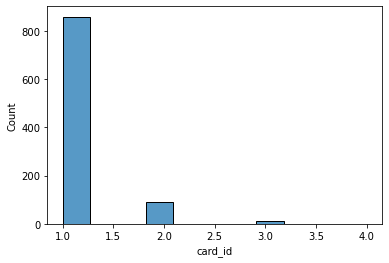

In [40]:
sns.histplot(card_counts)

In [41]:
play_req_counts = play_requirements_df.index.value_counts()
play_req_counts

CFM_603          5
KAR_033          5
EX1_334          5
KARA_08_05       4
GVG_083          4
                ..
BRM_003          1
OG_006b          1
BRMA02_2_2_TB    1
EX1_345          1
OG_080f          1
Name: card_id, Length: 435, dtype: int64

<AxesSubplot:xlabel='card_id', ylabel='Count'>

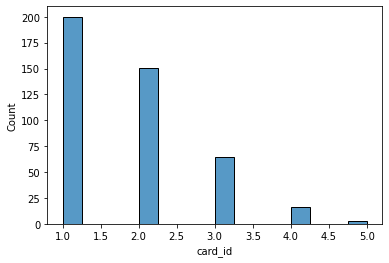

In [42]:
sns.histplot(play_req_counts)

#### Outer Joins

In the cell below, perform an outer join between `cards_df` and `dust_df`. Since these tables contain columns with the same name, we'll need to specify a suffix for at least one of them, so that the column can be renamed to avoid a naming collision. 

During this join, set the `rsuffix` parameter to `_dust`

In [15]:
outer_join_df = cards_df.join(dust_df, rsuffix='_dust', how='outer')
outer_join_df

,player_class,type,name,set,text,cost,attack,health,rarity,collectible,flavor,race,how_to_earn,how_to_earn_golden,targeting_arrow_text,faction,durability,action,cost_dust
card_id,,,,,,,,,,,,,,,,,,,
AT_001,MAGE,SPELL,Flame Lance,TGT,Deal $8 damage to a minion.,5.0,NaN,NaN,COMMON,1.0,"It's on the rack next to ice lance, acid lance...",NaN,NaN,NaN,NaN,NaN,NaN,CRAFTING_NORMAL,40.0
AT_001,MAGE,SPELL,Flame Lance,TGT,Deal $8 damage to a minion.,5.0,NaN,NaN,COMMON,1.0,"It's on the rack next to ice lance, acid lance...",NaN,NaN,NaN,NaN,NaN,NaN,CRAFTING_GOLDEN,400.0
AT_001,MAGE,SPELL,Flame Lance,TGT,Deal $8 damage to a minion.,5.0,NaN,NaN,COMMON,1.0,"It's on the rack next to ice lance, acid lance...",NaN,NaN,NaN,NaN,NaN,NaN,DISENCHANT_NORMAL,5.0
AT_001,MAGE,SPELL,Flame Lance,TGT,Deal $8 damage to a minion.,5.0,NaN,NaN,COMMON,1.0,"It's on the rack next to ice lance, acid lance...",NaN,NaN,NaN,NaN,NaN,NaN,DISENCHANT_GOLDEN,50.0
AT_002,MAGE,SPELL,Effigy,TGT,"<b>Secret:</b> When a friendly minion dies, su...",3.0,NaN,NaN,RARE,1.0,"Burning man, brah.",NaN,NaN,NaN,NaN,NaN,NaN,CRAFTING_NORMAL,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt_010,MAGE,SPELL,Spellbender,EXPERT1,<b>Secret:</b> When an enemy casts a spell on ...,3.0,NaN,NaN,EPIC,1.0,While it's fun to intercept enemy lightning bo...,NaN,NaN,NaN,NaN,NaN,NaN,DISENCHANT_GOLDEN,400.0
tt_010a,MAGE,MINION,Spellbender,EXPERT1,NaN,1.0,1.0,3.0,EPIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CRAFTING_NORMAL,400.0
tt_010a,MAGE,MINION,Spellbender,EXPERT1,NaN,1.0,1.0,3.0,EPIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CRAFTING_GOLDEN,1600.0


Inspect the output above.  Note that the naming collision has been avoided by renaming the `cost` column from the right table to `cost_dust`.  

## Summary

In this lab, you learned how to:

* Concatenate multiple DataFrames together into a single DataFrame
* Understand and execute the various types of joins (inner, outer, left, and right joins)